In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install folium geopy
import folium
from folium.plugins import HeatMap

In [ ]:
df = pd.read_csv('canadian_immegration_data.csv')

print(df.head())

          Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   
2    71    69    63    44  ...  3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...     0     1     0     0     0     0     0   
4     0     0     0     0  ...     0     1     1     0     0     0     0   

   2012  2013  Total  
0  2635  2004  58639  
1   620   603  1

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

In [ ]:
print(df.describe())


               1980          1981          1982          1983          1984  \
count    195.000000    195.000000    195.000000    195.000000    195.000000   
mean     508.394872    566.989744    534.723077    387.435897    376.497436   
std     1949.588546   2152.643752   1866.997511   1204.333597   1198.246371   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       13.000000     10.000000     11.000000     12.000000     13.000000   
75%      251.500000    295.500000    275.000000    173.000000    181.000000   
max    22045.000000  24796.000000  20620.000000  10015.000000  10170.000000   

              1985         1986          1987          1988          1989  \
count   195.000000   195.000000    195.000000    195.000000    195.000000   
mean    358.861538   441.271795    691.133333    714.389744    843.241026   
std    1079.309600  1225.576630   2109.205607   2443.6067

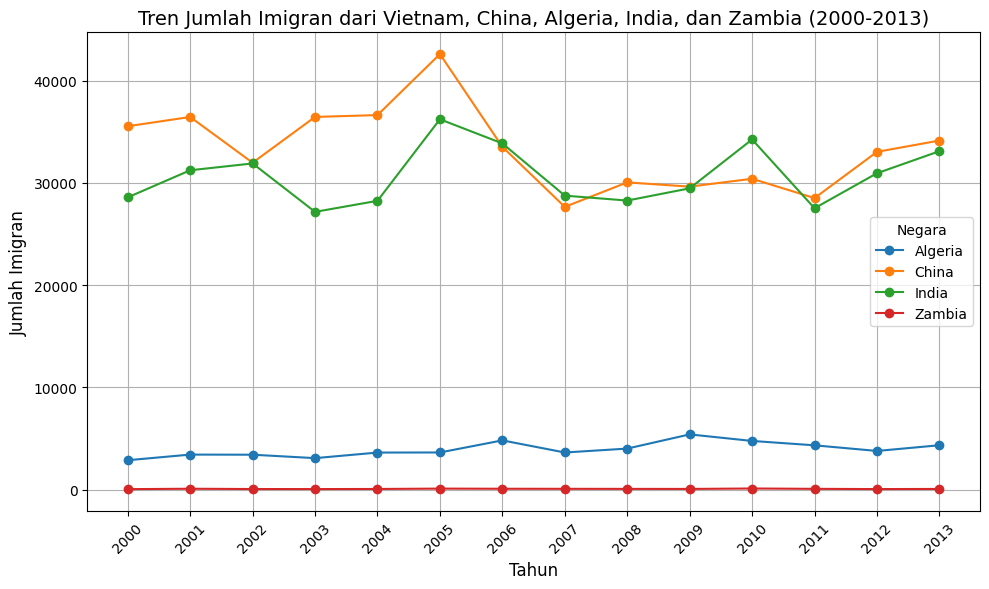

In [ ]:
countries = ['Vietnam', 'China', 'Algeria', 'India', 'Zambia']

df_filtered = df[df['Country'].isin(countries)]

years = list(map(str, range(2000, 2014)))  # ['2000', '2001', ..., '2013']
df_filtered_years = df_filtered[['Country'] + years]

df_filtered_years.set_index('Country', inplace=True)

plt.figure(figsize=(10, 6))

for country in df_filtered_years.index:
    plt.plot(years, df_filtered_years.loc[country], marker='o', label=country)

plt.title('Tren Jumlah Imigran dari Vietnam, China, Algeria, India, dan Zambia (2000-2013)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Imigran', fontsize=12)

plt.legend(title='Negara')

plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

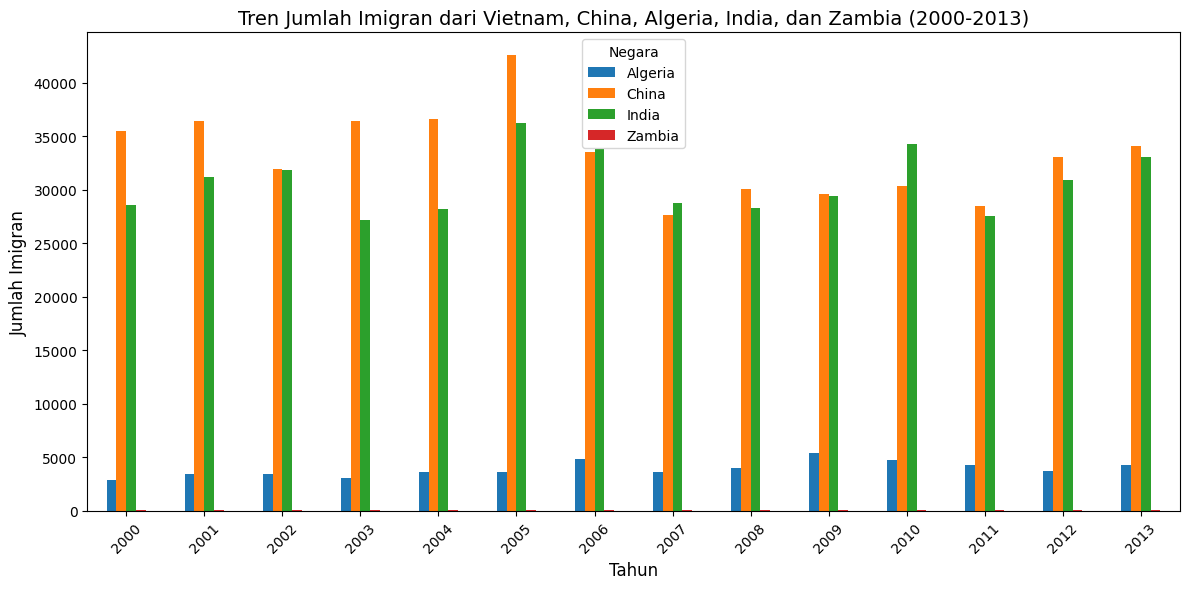

In [ ]:
countries = ['Vietnam', 'China', 'Algeria', 'India', 'Zambia']
df_filtered = df[df['Country'].isin(countries)]

years = list(map(str, range(2000, 2014)))
df_filtered_years = df_filtered[['Country'] + years]
df_filtered_years.set_index('Country', inplace=True)

df_plot = df_filtered_years.transpose()

plt.figure(figsize=(12, 6))
df_plot.plot(kind='bar', figsize=(12, 6))
plt.title('Tren Jumlah Imigran dari Vietnam, China, Algeria, India, dan Zambia (2000-2013)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Imigran', fontsize=12)
plt.legend(title='Negara')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

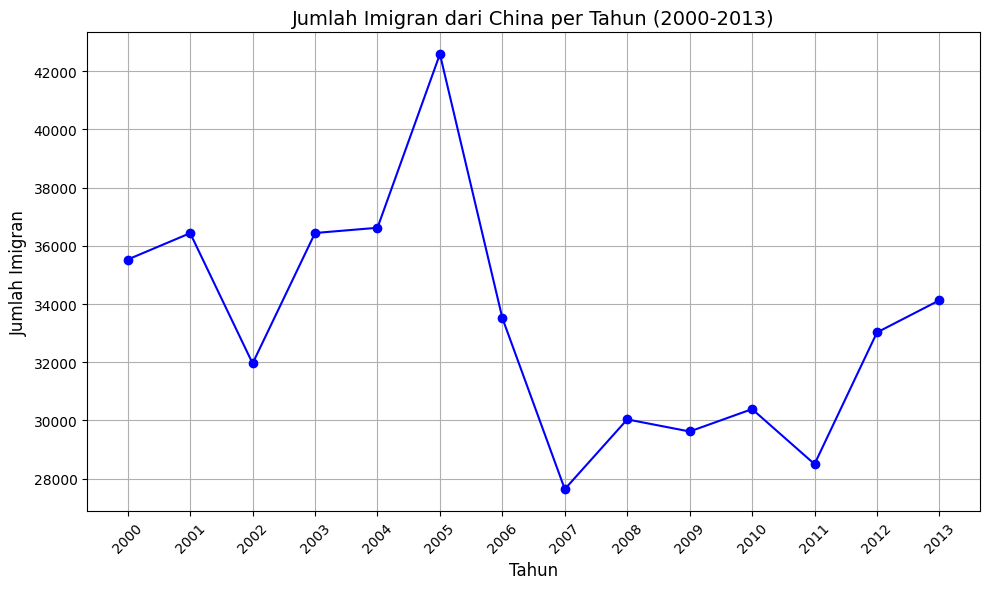

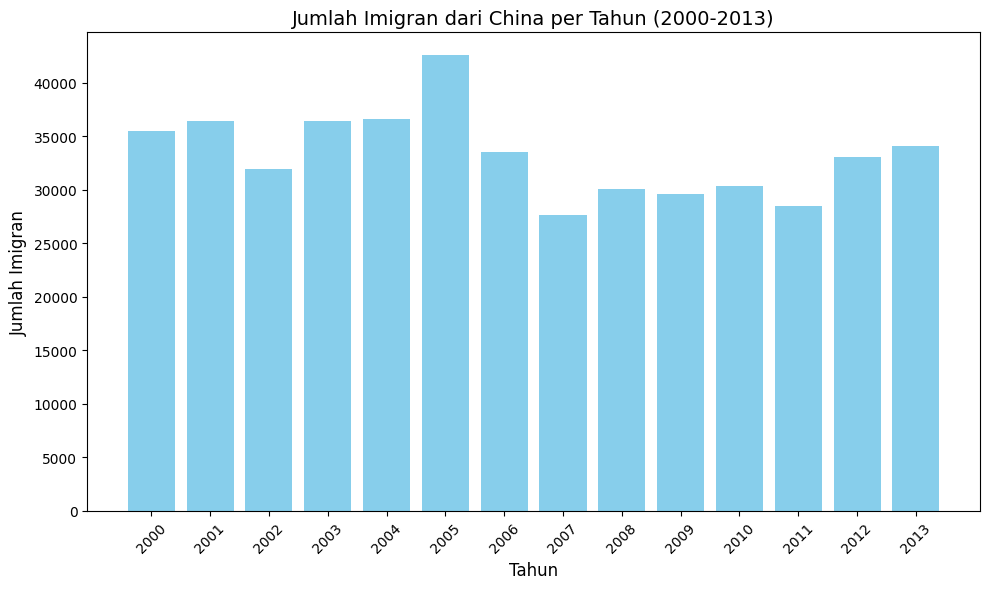

In [ ]:
df_china = df[df['Country'] == 'China']

years = list(map(str, range(2000, 2014)))
df_china_years = df_china[years].T  # Transpose data agar tahun menjadi index
df_china_years.columns = ['Imigran']

plt.figure(figsize=(10, 6))

plt.plot(df_china_years.index, df_china_years['Imigran'], marker='o', linestyle='-', color='b')

plt.title('Jumlah Imigran dari China per Tahun (2000-2013)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Imigran', fontsize=12)

plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(df_china_years.index, df_china_years['Imigran'], color='skyblue')

plt.title('Jumlah Imigran dari China per Tahun (2000-2013)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Imigran', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
years = list(map(str, range(2000, 2013)))
df_years = df[['Country'] + years]

total_immigration_per_country = df_years.groupby('Country')[years].sum().sum(axis=1)

top_10_countries = total_immigration_per_country.sort_values(ascending=False).head(10)

print("Top 10 negara dengan jumlah imigran terbanyak (2000-2013):")
print(top_10_countries)

Top 10 negara dengan jumlah imigran terbanyak (2000-2013):
Country
China                                                   432302
India                                                   396268
Philippines                                             282601
Pakistan                                                153104
United Kingdom of Great Britain and Northern Ireland    104536
United States of America                                 98882
Iran (Islamic Republic of)                               88284
Republic of Korea                                        83624
Sri Lanka                                                60747
Colombia                                                 59136
dtype: int64


In [ ]:
total_immigration_per_country = df_years.groupby('Country')[years].sum().sum(axis=1)

top_10_countries = total_immigration_per_country.sort_values(ascending=False).head(10)

print("Top 10 negara dengan jumlah imigran terbanyak (2000-2013):")

country_mapping = {
    "Pakistan": "Pakistan",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "United States of America": "America",
    "Iran (Islamic Republic of)": "Iran",
    "Republic of Korea": "South Korea"
}
top_10_countries.rename(index=country_mapping, inplace=True)


print(top_10_countries)

Top 10 negara dengan jumlah imigran terbanyak (2000-2013):
Country
China             432302
India             396268
Philippines       282601
Pakistan          153104
United Kingdom    104536
America            98882
Iran               88284
South Korea        83624
Sri Lanka          60747
Colombia           59136
dtype: int64


In [ ]:

print("\nMerged DataFrame Columns:")
print(top_10_with_coords.columns)

print("\nMerged DataFrame Head:")
print(top_10_with_coords.head())



Merged DataFrame Columns:
Index(['Country', 'Total_Immigrants', 'country_code', 'Latitude', 'Longitude',
       'usa_state_code', 'usa_state_latitude', 'usa_state_longitude',
       'usa_state'],
      dtype='object')

Merged DataFrame Head:
          Country  Total_Immigrants country_code   Latitude   Longitude  \
0           China            432302           CN  35.861660  104.195397   
1           India            396268           IN  20.593684   78.962880   
2     Philippines            282601           PH  12.879721  121.774017   
3        Pakistan            153104           PK  30.375321   69.345116   
4  United Kingdom            104536           GB  55.378051   -3.435973   

  usa_state_code  usa_state_latitude  usa_state_longitude usa_state  
0             UT            39.32098          -111.093731      Utah  
1            NaN                 NaN                  NaN       NaN  
2            NaN                 NaN                  NaN       NaN  
3            NaN          

In [ ]:

top_10_df = top_10_countries.reset_index()
top_10_df.columns = ['Country', 'Total_Immigrants']

country_coordinates = pd.read_csv('country_coordinates.csv')

top_10_df.columns = top_10_df.columns.str.strip()
country_coordinates.columns = country_coordinates.columns.str.strip()

top_10_with_coords = pd.merge(top_10_df, country_coordinates, on='Country', how='left')

top_10_with_coords = top_10_with_coords.dropna(subset=['Latitude', 'Longitude'])

heat_data = [[row['Latitude'], row['Longitude'], row['Total_Immigrants']] for index, row in top_10_with_coords.iterrows()]

map_center = [40, -100]
my_map = folium.Map(location=map_center, zoom_start=3)

HeatMap(heat_data, radius=30).add_to(my_map)

my_map
